In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

25.2738321837215


/tmp/ipykernel_132308/2359095630.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([tokens_150, tokens_170, tokens_190],


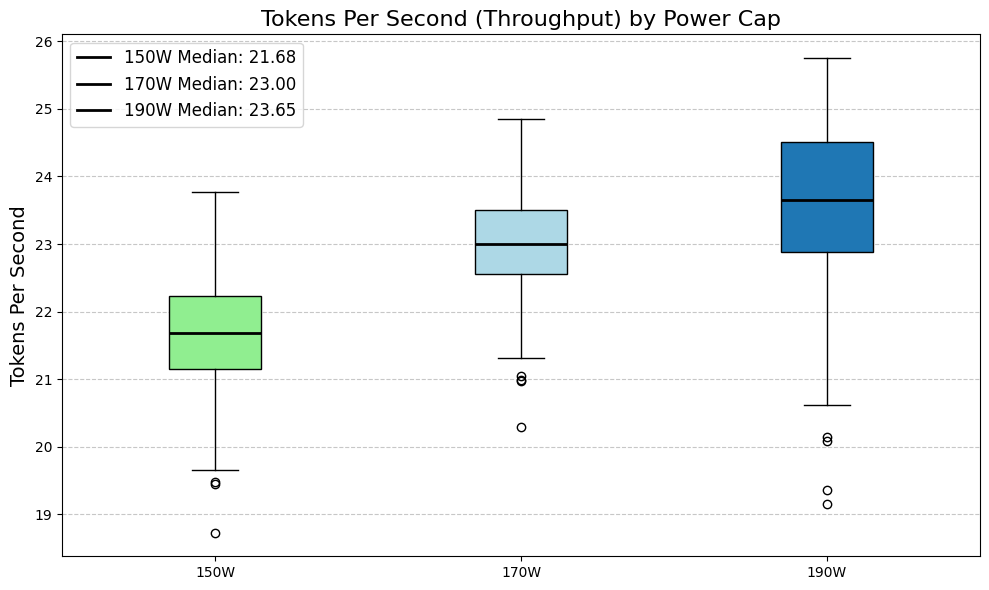

In [ ]:
# Load and convert
throughput150 = pd.read_csv("generation_times150.csv").apply(pd.to_datetime)
throughput170 = pd.read_csv("generation_times170.csv").apply(pd.to_datetime)
throughput190 = pd.read_csv("generation_times190.csv").apply(pd.to_datetime)

# Function to compute tokens/sec
def compute_tokens_per_sec(df):
    tokens_per_sec_list = []
    for _, row in df.iterrows():
        times = list(row)
        first = times[1]
        tokens_per_sec = []

        for i in range(2, len(times)):
            tiempo = (times[i] - first).total_seconds()
            first = times[i]
            if tiempo > 0:
                tokens_per_sec.append(1 / tiempo)

        mean_tps = np.mean(tokens_per_sec) if tokens_per_sec else 0
        tokens_per_sec_list.append(mean_tps)
    return tokens_per_sec_list

tokens_150 = compute_tokens_per_sec(throughput150)
tokens_170 = compute_tokens_per_sec(throughput170)
tokens_190 = compute_tokens_per_sec(throughput190)


# Create side-by-side boxplot
plt.figure(figsize=(10, 6))
bp = plt.boxplot([tokens_150, tokens_170, tokens_190],
                 patch_artist=True,
                 labels=["150W", "170W", "190W"],
                 medianprops=dict(color='black', linewidth=2))

# Set individual box colors
colors = ['lightgreen', 'lightblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')

# Extract medians
median_150 = bp['medians'][0].get_ydata()[0]
median_170 = bp['medians'][1].get_ydata()[0]
median_190 = bp['medians'][2].get_ydata()[0]

# Create legend
legend_lines = [
    Line2D([0], [0], color='black', linewidth=2, label=f"150W Median: {median_150:.2f}"),
    Line2D([0], [0], color='black', linewidth=2, label=f"170W Median: {median_170:.2f}"),
    Line2D([0], [0], color='black', linewidth=2, label=f"190W Median: {median_190:.2f}")
]

plt.title("Tokens Per Second (Throughput) by Power Cap", fontsize=16)
plt.ylabel("Tokens Per Second", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(handles=legend_lines, loc='upper left', fontsize=12)
plt.tight_layout()
plt.savefig



Total energy 150W (Joules): 23305.8783
Total energy 170W (Joules): 24321.1102
Total energy 190W (Joules): 25295.7349


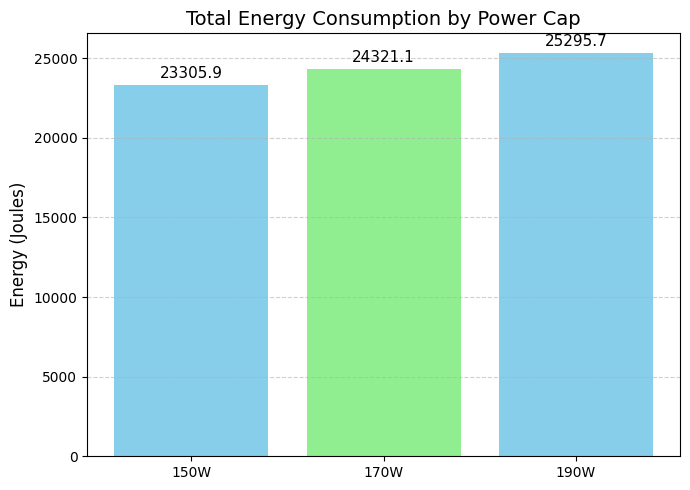

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
watts150 = pd.read_csv("./csv/gpuMeasurements150.csv")
watts170 = pd.read_csv("./csv/gpuMeasurements170.csv")
watts190 = pd.read_csv("./csv/gpuMeasurements190.csv")

# Sampling rate
rate_of_samples = 500
sample_time = 1 / rate_of_samples  # seconds per sample

# Calculate VoltageSum and Joules for 150W
watts150["VoltageSum"] = watts150.sum(axis=1)
watts150["Joules"] = watts150["VoltageSum"] * sample_time
total_energy_150 = watts150["Joules"].sum()

# Calculate VoltageSum and Joules for 170W
watts170["VoltageSum"] = watts170.sum(axis=1)
watts170["Joules"] = watts170["VoltageSum"] * sample_time
total_energy_170 = watts170["Joules"].sum()

# Calculate VoltageSum and Joules for 190W
watts190["VoltageSum"] = watts190.sum(axis=1)
watts190["Joules"] = watts190["VoltageSum"] * sample_time
total_energy_190 = watts190["Joules"].sum()

print(f"Total energy 150W (Joules): {total_energy_150:.4f}")
print(f"Total energy 170W (Joules): {total_energy_170:.4f}")
print(f"Total energy 190W (Joules): {total_energy_190:.4f}")

# Create side-by-side bar plot
plt.figure(figsize=(7, 5))
power_caps = ['150W', '170W', '190W']
energies = [total_energy_150, total_energy_170, total_energy_190]
colors = ['skyblue', 'lightgreen']

bars = plt.bar(power_caps, energies, color=colors)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(energies)*0.01, f"{yval:.1f}", ha='center', va='bottom', fontsize=11)

plt.ylabel("Energy (Joules)", fontsize=12)
plt.title("Total Energy Consumption by Power Cap", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


(0.0, 1.0, 0.0, 1.0)

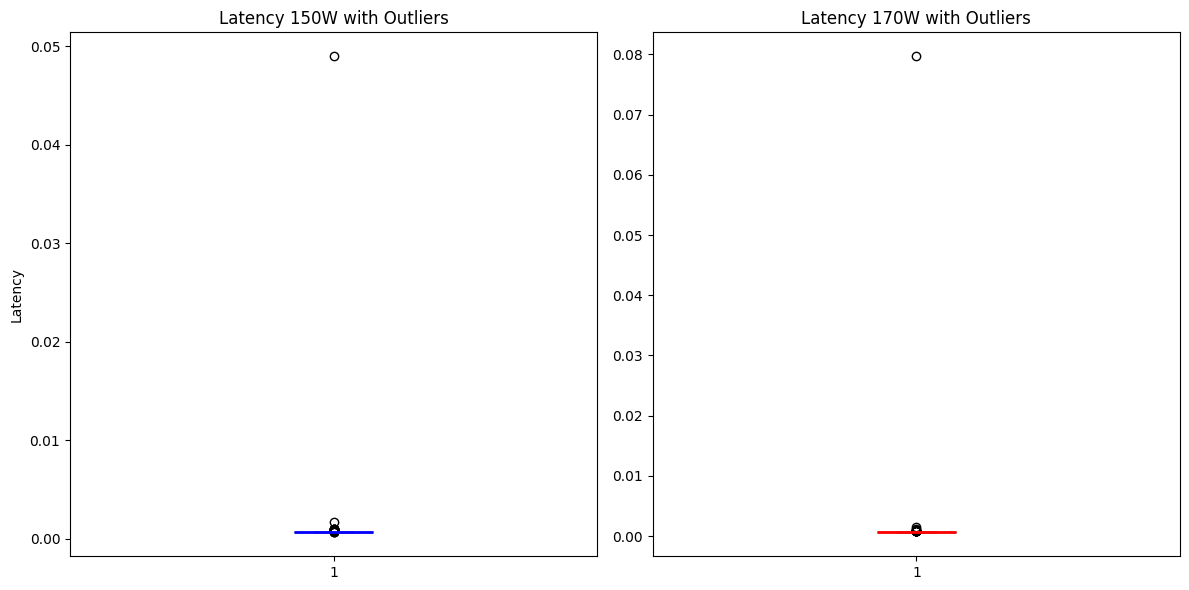

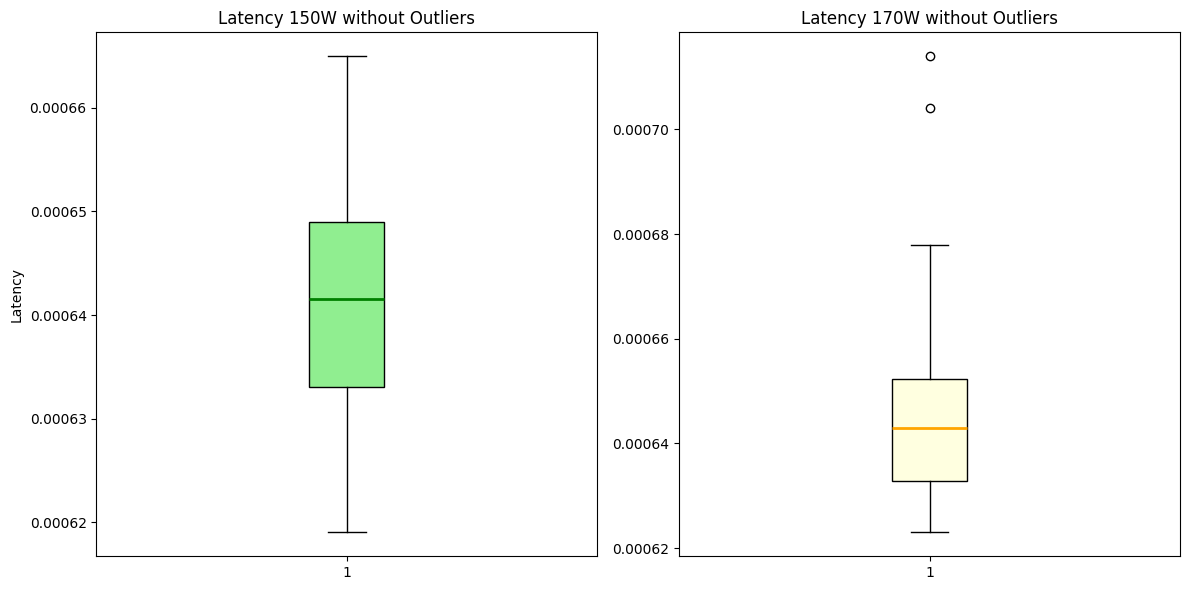

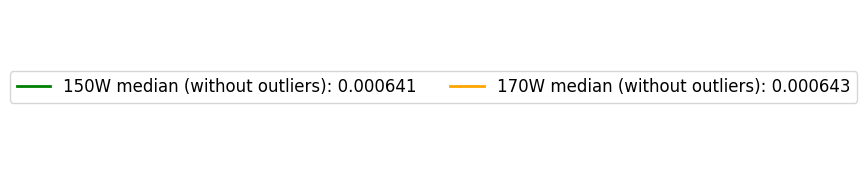

In [60]:
# Load data
latency150 = pd.read_csv("./latency_times150.csv")
latency170 = pd.read_csv("./latency_times170.csv")

def filter_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered

# Extract latency column (assuming single column)
latency150_values = latency150.iloc[:, 0]
latency170_values = latency170.iloc[:, 0]

# Filter outliers
filtered_150 = filter_outliers(latency150_values)
filtered_170 = filter_outliers(latency170_values)

plt.figure(figsize=(12, 6))

# Plot latency150 with outliers
plt.subplot(1, 2, 1)
bp150 = plt.boxplot(latency150_values, vert=True, patch_artist=True,
                    boxprops=dict(facecolor="lightblue"),
                    medianprops=dict(color='blue', linewidth=2))
median_150 = bp150['medians'][0].get_ydata()[0]
plt.title("Latency 150W with Outliers")
plt.ylabel("Latency")

# Plot latency170 with outliers
plt.subplot(1, 2, 2)
bp170 = plt.boxplot(latency170_values, vert=True, patch_artist=True,
                    boxprops=dict(facecolor="lightcoral"),
                    medianprops=dict(color='red', linewidth=2))
median_170 = bp170['medians'][0].get_ydata()[0]
plt.title("Latency 170W with Outliers")

plt.tight_layout()

# Create a new figure for filtered latency (without outliers)
plt.figure(figsize=(12, 6))

# Plot filtered latency150
plt.subplot(1, 2, 1)
bp150_filtered = plt.boxplot(filtered_150, vert=True, patch_artist=True,
                             boxprops=dict(facecolor="lightgreen"),
                             medianprops=dict(color='green', linewidth=2))
median_150_filtered = bp150_filtered['medians'][0].get_ydata()[0]
plt.title("Latency 150W without Outliers")
plt.ylabel("Latency")

# Plot filtered latency170
plt.subplot(1, 2, 2)
bp170_filtered = plt.boxplot(filtered_170, vert=True, patch_artist=True,
                             boxprops=dict(facecolor="lightyellow"),
                             medianprops=dict(color='orange', linewidth=2))
median_170_filtered = bp170_filtered['medians'][0].get_ydata()[0]
plt.title("Latency 170W without Outliers")

plt.tight_layout()

# Create a combined legend for medians
median_lines = [
    # Line2D([0], [0], color='blue', linewidth=2, label=f"150W median (with outliers): {median_150:.2f}"),
    # Line2D([0], [0], color='red', linewidth=2, label=f"170W median (with outliers): {median_170:.2f}"),
    Line2D([0], [0], color='green', linewidth=2, label=f"150W median (without outliers): {median_150_filtered:.6f}"),
    Line2D([0], [0], color='orange', linewidth=2, label=f"170W median (without outliers): {median_170_filtered:.6f}")
]

plt.figure(figsize=(8, 2))
plt.legend(handles=median_lines, loc='center', ncol=2, fontsize=12)
plt.axis('off')  # Hide axis